In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
simplefilter('ignore')

### *Please include all code used throughout the model creation in this notebook, not just the completed model*

In [2]:
# loading the dataset
df = pd.read_csv('tennis_data.csv')
df.head()

,game_id,set_num,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player
0,1,1,1,0,0,0,0,0,0,2
1,1,1,1,15,0,0,0,0,0,2
2,1,1,1,15,15,0,0,0,0,2
3,1,1,1,30,15,0,0,0,0,2
4,1,1,1,40,15,0,0,0,0,2


In [3]:
# checking the missing values, present in the dataset
missing_values = df.isnull().sum()
missing_values

game_id                 0
set_num                 0
serving_player          0
player_1_points         0
player_2_points         0
player_1_games          0
player_2_games          0
player_1_sets           0
player_2_sets           0
match_winning_player    0
dtype: int64

In [4]:
df.shape

(18505, 10)

In [5]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['serving_player'] = label_encoder.fit_transform(df['serving_player'])

In [6]:
# Created a dictionary to map 'AD' to a numerical value
# Assuming that 'AD' is present in 'player_1_points' and 'player_2_points', and 'match_winning_player' is the target variable
points_mapping = {'AD':50}

# Apply the mapping to 'player_1_points' and 'player_2_points'
df['player_1_points'] = df['player_1_points'].replace(points_mapping)
df['player_2_points'] = df['player_2_points'].replace(points_mapping)


In [7]:
# Creating a binary target variable: 1 if player 1 wins, 0 otherwise
df['target'] = (df['player_1_points'].astype(int) > df['player_2_points'].astype(int)).astype(int)

In [8]:
df.head()

,game_id,set_num,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player,target
0,1,1,0,0,0,0,0,0,0,2,0
1,1,1,0,15,0,0,0,0,0,2,1
2,1,1,0,15,15,0,0,0,0,2,0
3,1,1,0,30,15,0,0,0,0,2,1
4,1,1,0,40,15,0,0,0,0,2,1


In [9]:
# selecting the relavant features
features = ['serving_player','player_1_points','player_2_points','player_1_games','player_2_games','player_1_sets','player_2_sets']
features

['serving_player',
 'player_1_points',
 'player_2_points',
 'player_1_games',
 'player_2_games',
 'player_1_sets',
 'player_2_sets']

In [10]:
# splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df[features],df['target'],test_size=0.2, random_state=42)

In [11]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make Predections
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
# Evaluating the model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [14]:
# Displaying the performance of the model
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[2500    0]
 [   0 1201]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00      1201

    accuracy                           1.00      3701
   macro avg       1.00      1.00      1.00      3701
weighted avg       1.00      1.00      1.00      3701



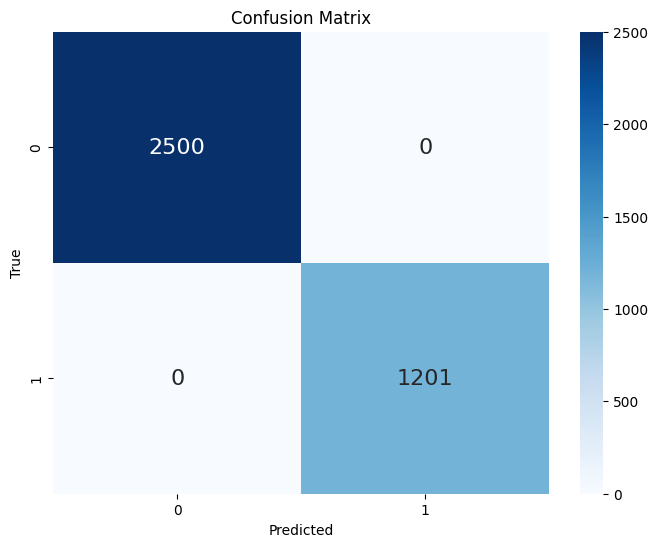

In [15]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

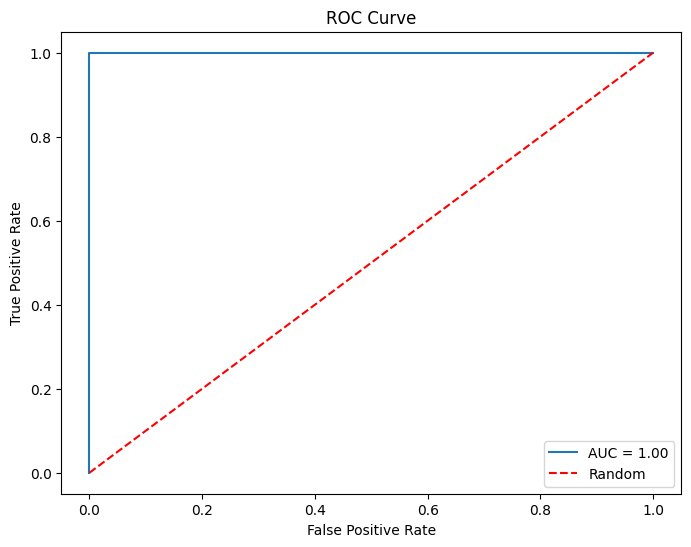

In [16]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**RandomForestClassifier**

In [17]:
# Creating a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
# Training the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Making predictions on the testing data
y_pred_clf = clf.predict(X_test)
y_pred_clf

array([0, 1, 1, ..., 0, 0, 0])

In [20]:
# Evaluate the performance
accuracy_clf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000
